In [ ]:
pip install laion-clap

In [ ]:
import numpy as np
import librosa
import torch
import laion_clap

# quantization
def int16_to_float32(x):
    return (x / 32767.0).astype(np.float32)


def float32_to_int16(x):
    x = np.clip(x, a_min=-1., a_max=1.)
    return (x * 32767.).astype(np.int16)

model = laion_clap.CLAP_Module(enable_fusion=False, amodel= 'HTSAT-base')
model.load_ckpt('/Users/ritwikvashistha/Downloads/music_speech_audioset_epoch_15_esc_89.98.pt') # download the default pretrained checkpoint.



/Users/ritwikvashistha/anaconda3/envs/cv/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/Users/ritwikvashistha/anaconda3/envs/cv/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probabl

Load the specified checkpoint /Users/ritwikvashistha/Downloads/music_speech_audioset_epoch_15_esc_89.98.pt from users.
Load Checkpoint...
logit_scale_a 	 Loaded
logit_scale_t 	 Loaded
audio_branch.spectrogram_extractor.stft.conv_real.weight 	 Loaded
audio_branch.spectrogram_extractor.stft.conv_imag.weight 	 Loaded
audio_branch.logmel_extractor.melW 	 Loaded
audio_branch.bn0.weight 	 Loaded
audio_branch.bn0.bias 	 Loaded
audio_branch.patch_embed.proj.weight 	 Loaded
audio_branch.patch_embed.proj.bias 	 Loaded
audio_branch.patch_embed.norm.weight 	 Loaded
audio_branch.patch_embed.norm.bias 	 Loaded
audio_branch.layers.0.blocks.0.norm1.weight 	 Loaded
audio_branch.layers.0.blocks.0.norm1.bias 	 Loaded
audio_branch.layers.0.blocks.0.attn.relative_position_bias_table 	 Loaded
audio_branch.layers.0.blocks.0.attn.qkv.weight 	 Loaded
audio_branch.layers.0.blocks.0.attn.qkv.bias 	 Loaded
audio_branch.layers.0.blocks.0.attn.proj.weight 	 Loaded
audio_branch.layers.0.blocks.0.attn.proj.bias 	 Loa

In [ ]:
import os
from natsort import natsorted
from scipy.io import wavfile

# Path to main folder containing all subfolders
main_folder = "/Users/ritwikvashistha/Downloads/mic1_renamed_trim_2"

# First, get the subfolders in a natural-sorted list
# (in case your subfolders also have numeric components in their names)
subfolders = [
    f for f in os.listdir(main_folder)
    if os.path.isdir(os.path.join(main_folder, f))
]
subfolders = natsorted(subfolders)

all_wavs = []  # to collect (filepath, sr, data) or similar

for subfolder in subfolders:
    subfolder_path = os.path.join(main_folder, subfolder)

    # List .wav files in subfolder
    wav_files = [
        f for f in os.listdir(subfolder_path)
        if f.lower().endswith(".wav")
    ]
    # Sort them in natural order
    wav_files = natsorted(wav_files)

    # Process each .wav file
    for wav_file in wav_files:
        wav_path = os.path.join(subfolder_path, wav_file)

        # for example, using librosa (just as a placeholder)
        # import librosa
        # data, sr = librosa.load(wav_path, sr=None)

        # or using scipy
        data,sr = librosa.load(wav_path,sr=48000)

        # collect or do something with the data
        all_wavs.append((wav_path, sr, data))

In [ ]:
import pandas as pd
meta_participant = pd.read_csv('/Users/ritwikvashistha/Downloads/meta_participant.csv')
meta_audio = pd.read_csv('/Users/ritwikvashistha/Downloads/meta_audio.csv')

In [ ]:
filtered_indices = meta_audio[meta_audio['ACTION LABEL'].isin([0, 1, 2])].index
# filtered_wavs = [all_wavs[i] for i in filtered_indices]

In [ ]:
# Get audio embeddings from audio data
audio_data, _ = librosa.load('/Users/ritwikvashistha/Downloads/mic1_renamed_trim_2/p10085/p10085.LC.1.161.wav', sr=48000) # sample rate should be 48000
audio_data = audio_data.reshape(1, -1) # Make it (1,T) or (N,T)
audio_embed = model.get_audio_embedding_from_data(x = audio_data, use_tensor=False)
print(audio_embed[:,-20:])
print(audio_embed.shape)


[[ 0.04740363  0.08318029  0.07488987  0.05759652 -0.07092518 -0.02472855
  -0.06366072  0.0830975  -0.10711682  0.01761003 -0.02449952  0.01571384
   0.06574909 -0.01752417 -0.0208378   0.03108453 -0.02417281 -0.01305506
   0.05557008  0.01541279]]
(1, 512)


In [ ]:
from tqdm import tqdm # Import the tqdm function from the tqdm module

embeddings = []
for i in tqdm(range(len(all_wavs))): # Now, you're calling the tqdm function
  audio_data = all_wavs[i][2]
  audio_data = audio_data.reshape(1, -1)
  audio_embed = model.get_audio_embedding_from_data(x=audio_data, use_tensor=False)
  embeddings.append(audio_embed)

print(embeddings[0][:,-20:])
embeddings[0].shape

100%|███████████████████████████████████████| 7044/7044 [17:37<00:00,  6.66it/s]

[[-0.01473507  0.01407797  0.0626817   0.08060933  0.0819184   0.01088174
  -0.01646244 -0.03592059 -0.03780747  0.04159881 -0.02378966 -0.02779253
  -0.09213068 -0.01054638  0.09020866 -0.01271665 -0.03600214  0.08788741
   0.00368625 -0.05718192]]


(1, 512)

In [ ]:
from tqdm import tqdm # Import the tqdm function from the tqdm module

text_embeddings = []
for i in tqdm(range(len(meta_audio))): # Now, you're calling the tqdm function
  text_data = meta_audio['NOTES'][i]
  text_embed = model.get_text_embedding(text_data)
  text_embeddings.append(text_embed)

# print(text_embeddings)
text_embeddings.shape

100%|███████████████████████████████████████| 7044/7044 [07:42<00:00, 15.24it/s]


In [ ]:
text_embeddings_array = np.array(text_embeddings).squeeze()
text_embeddings_array.shape

(7044, 512)

In [ ]:
np.save('Text Embeddings.npy', text_embeddings_array)

In [ ]:
# Convert embeddings to a NumPy array
X = np.array(embeddings).squeeze() # Squeeze to remove extra dimensions if necessary
X_filtered = X[filtered_indices]

In [ ]:
np.save('Audio Embeddings.npy', X)

In [ ]:
# prompt: load Audio Embeddings.npy

import numpy as np

# Load the saved embeddings
audio_embeddings = np.load('Audio Embeddings.npy')

# Now you can work with the loaded embeddings
print(audio_embeddings.shape)



(7044, 512)


In [ ]:
embeddings_combined = np.concatenate((audio_embeddings, text_embeddings_array), axis=1)
embeddings_combined.shape

(7044, 1024)

In [ ]:
participant_data= meta_participant.loc[meta_participant.index.repeat(meta_participant["NUMBER OF FILES"])]

# 3. Reset the index (optional, but usually helpful)
participant_data.reset_index(drop=True, inplace=True)
# Merge meta_audio and participant_data DataFrames
merged_df = pd.merge(meta_audio, participant_data, left_index=True, right_index=True)
# merged_df = merged_df[merged_df['ACTION LABEL'].isin([0, 1, 2])]

In [ ]:
tabular_data = merged_df.loc[:, ['GENDER', 'AGE', 'RACE/ETHNICITY', 'TOTAL DURATION (SEC)']]
tabular_data = pd.get_dummies(tabular_data, columns=['GENDER', 'RACE/ETHNICITY'], dtype=np.float32)
num_tab_features = tabular_data.shape[1]

In [ ]:
labels = merged_df.loc[:,'REVISED PAIN']
labels= np.array([0 if x < 4 else 1 for x in labels]) # Labels: 0 or 1 for "No Pain"/"Pain"

In [ ]:
# prompt: fit a random forest classifier using embeddings as vairables and labels as target

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [ ]:
df = pd.DataFrame(embeddings_combined)
tabular_data_reset = tabular_data.reset_index(drop=False)  # Reset index of tabular_data
merged_features = pd.concat([df, tabular_data_reset], axis=1) # Concatenate along columns (axis=1)
merged_features.index = merged_df.index
merged_features = merged_features.drop(columns=['index'])
merged_features.head()

,0,1,2,3,4,5,6,7,8,9,...,TOTAL DURATION (SEC),GENDER_Male,GENDER_Man,GENDER_Non-binary,GENDER_Woman,RACE/ETHNICITY_Asian,RACE/ETHNICITY_Black or African American,RACE/ETHNICITY_Hispanic/Latino,RACE/ETHNICITY_Two or more races,RACE/ETHNICITY_White
0,-0.057114,0.059313,-0.060191,-0.018176,-0.084338,0.034319,-0.058333,0.018405,0.068168,-0.077160,...,300.45,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,-0.074543,0.059482,-0.023707,-0.031039,-0.080793,0.020725,-0.059566,0.012630,0.088856,-0.075533,...,300.45,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,-0.088873,0.066683,-0.039078,-0.013078,-0.081851,0.002385,-0.033466,0.038995,0.053495,-0.089921,...,300.45,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,-0.079781,0.052505,-0.031692,-0.014320,-0.075479,0.012609,-0.057462,-0.004710,0.082208,-0.084615,...,300.45,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,-0.067623,0.042367,-0.049939,-0.033383,-0.096456,0.037647,-0.042283,0.001679,0.071254,-0.070512,...,300.45,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
unique_pids = np.array(merged_df['PID_x'].unique())
random_pid = np.random.choice(unique_pids, size=10, replace=False)
# X_train, y_train = merged_features[~merged_df['PID_x'].isin(random_pid)], labels[~merged_df['PID_x'].isin(random_pid)]
# X_test, y_test = merged_features[merged_df['PID_x'].isin(random_pid)], labels[merged_df['PID_x'].isin(random_pid)]

X_train, X_test, y_train, y_test = train_test_split(merged_features, labels, test_size=0.3, random_state=2)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)


# Define the neural network architecture
class ComplexClassifier(nn.Module):
    def __init__(self, input_size):
        super(ComplexClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.3)  # Dropout for regularization
        self.fc2 = nn.Linear(256, 128)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(128, 64)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(0.3)
        self.fc4 = nn.Linear(64, 2)


    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.dropout3(x)
        x = self.fc4(x)
        return x

# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]  # Get the number of input features
model = ComplexClassifier(input_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)


# Training loop
num_epochs = 2500 # Adjust as needed
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch+1) % 100 == 0:
       print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


/Users/ritwikvashistha/anaconda3/envs/cv/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/ritwikvashistha/anaconda3/envs/cv/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/ritwikvashistha/anaconda3/envs/cv/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Epoch [100/2500], Loss: 0.1759
Epoch [200/2500], Loss: 0.0327
Epoch [300/2500], Loss: 0.0145
Epoch [400/2500], Loss: 0.0203
Epoch [500/2500], Loss: 0.0162
Epoch [600/2500], Loss: 0.0125
Epoch [700/2500], Loss: 0.0113
Epoch [800/2500], Loss: 0.0111
Epoch [900/2500], Loss: 0.0065
Epoch [1000/2500], Loss: 0.0064
Epoch [1100/2500], Loss: 0.0068
Epoch [1200/2500], Loss: 0.0155
Epoch [1300/2500], Loss: 0.0033
Epoch [1400/2500], Loss: 0.0066
Epoch [1500/2500], Loss: 0.0051
Epoch [1600/2500], Loss: 0.0039
Epoch [1700/2500], Loss: 0.0058
Epoch [1800/2500], Loss: 0.0073
Epoch [1900/2500], Loss: 0.0119
Epoch [2000/2500], Loss: 0.0058
Epoch [2100/2500], Loss: 0.0037
Epoch [2200/2500], Loss: 0.0040
Epoch [2300/2500], Loss: 0.0068
Epoch [2400/2500], Loss: 0.0056
Epoch [2500/2500], Loss: 0.0028


In [ ]:
y_pred_tensor = model(X_test_tensor)
y_pred = torch.argmax(y_pred_tensor, dim=1)

In [ ]:
for pid in random_pid:
  index = merged_df[merged_df['PID_x'] == pid].index
  X_test_pid = merged_features.iloc[index,:]
  X_test_scaled_pid = scaler.transform(X_test_pid)
  X_test_tensor_pid = torch.tensor(X_test_scaled_pid, dtype=torch.float32)
  y_pred_tensor_pid = model(X_test_tensor_pid)
  y_pred_pid = torch.argmax(y_pred_tensor_pid, dim=1).numpy()
  y_test_pid = labels[index]
  acc = accuracy_score(y_test_pid, y_pred_pid)
  auc = roc_auc_score(y_test_pid, y_pred_pid)
  # f1 = f1_score(y_test_pid, y_pred_pid,average='micro')

  # Print the results
  print(f"Test Accuracy: {acc * 100:.2f}%")
  print(f"Test AUC: {auc * 100:.2f}%")
  # print(f"Test F1 Score: {f1 * 100:.2f}%")

Test Accuracy: 74.65%
Test AUC: 73.17%
Test F1 Score: 74.65%


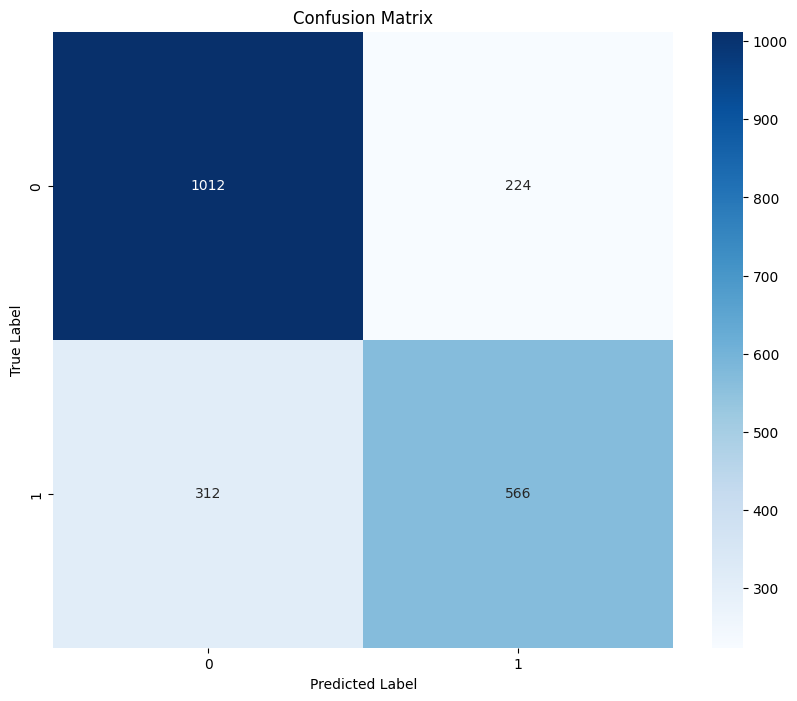

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# all_preds = xgb_classifier.predict(X_test)
all_preds = y_pred.numpy()
# Calculate accuracy
acc = accuracy_score(y_test, all_preds)
auc = roc_auc_score(y_test, all_preds)
f1_score = f1_score(y_test, all_preds,average='micro')

# Print the results
print(f"Test Accuracy: {acc * 100:.2f}%")
print(f"Test AUC: {auc * 100:.2f}%")
print(f"Test F1 Score: {f1_score * 100:.2f}%")

# Compute confusion matrix
cm = confusion_matrix(y_test, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()